<a href="https://colab.research.google.com/github/chien-sheng-liu/Interviews/blob/AdvanTech/AdvanTech_DataScientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# File Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip3 install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df_cal = pd.read_csv('drive/My Drive/AdvanTech/calendar.csv')
df_cal.tail(790)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1179,2014-04-22,11412,Tuesday,4,4,2014,d_1180,Pesach End,Religious,NaN,NaN,0,0,0
1180,2014-04-23,11412,Wednesday,5,4,2014,d_1181,NaN,NaN,NaN,NaN,0,0,0
1181,2014-04-24,11412,Thursday,6,4,2014,d_1182,NaN,NaN,NaN,NaN,0,0,0
1182,2014-04-25,11412,Friday,7,4,2014,d_1183,NaN,NaN,NaN,NaN,0,0,0
1183,2014-04-26,11413,Saturday,1,4,2014,d_1184,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [4]:
df_sales_train = pd.read_csv('drive/My Drive/AdvanTech/sales_train_evaluation.csv')
df_sales_train.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [5]:
df_sell = pd.read_csv('drive/My Drive/AdvanTech/sell_prices.csv')
df_sell.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [6]:
df_sample = pd.read_csv('drive/My Drive/AdvanTech/sample_submission.csv')
df_sample.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## DownCast

In [7]:
#We are now first reducing the size of our df, by changing the datatype from object.
#Reference: https://www.kaggle.com/code/anshuls235/time-series-forecasting-eda-fe-modelling/notebook
#Downcast in order to save memory
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df

In [8]:
df_cal=downcast(df_cal)
df_sales_train=downcast(df_sales_train)
df_sell=downcast(df_sell)
df_sample=downcast(df_sample)

<ipython-input-7-7d73f2a8f486>:24: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif t == np.object:
<ipython-input-7-7d73f2a8f486>:24: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif t == np.object:
<ipython-input-7-7d73f2a8f486>:24: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance:

## Split Out Val and Train Set

In [9]:
df_sales_train_validation = df_sales_train.iloc[:, 1919:]
df_sales_train_validation

##Validaiton data which is given in the test setting

,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,0,0,2,0,3,5,0,0,1,...,2,4,0,0,0,0,3,3,0,1
1,0,1,0,0,0,0,0,0,0,1,...,0,1,2,1,1,0,0,0,0,0
2,0,0,1,1,0,2,1,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,0,0,1,2,4,1,6,4,0,0,...,1,1,0,4,0,1,3,0,2,6
4,1,0,2,3,1,0,3,2,3,1,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,0,2,2,0,0,0,2,0,...,1,0,3,0,1,1,0,0,1,1
30486,0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
30487,0,0,1,1,0,2,1,1,0,0,...,0,0,1,2,0,1,0,1,0,2
30488,1,3,0,1,2,1,0,2,1,1,...,1,1,1,4,6,0,1,1,1,0


In [31]:
df_sales_train_train = df_sales_train.iloc[:, 1189:1919]
df = df_sales_train.iloc[:, :6]
df = df.join(df_sales_train_train)
df.head()

##Here I only fetch latest 2 years data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1184,d_1185,d_1186,d_1187,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,1,0,1,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1,4,1,1,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,1,2,0,...,2,1,1,0,1,1,2,2,2,4


##Melting

In [33]:
import pandas as pd

# Assuming your data is stored in a DataFrame called 'df'
melted_df = pd.melt(df, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                    value_vars=df.columns[df.columns.get_loc('d_1189'):],
                    var_name='date', value_name='sales')

# Print the melted DataFrame
melted_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,date,sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1189,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1189,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1189,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1189,1
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1189,0


In [34]:
melted_df = melted_df.sort_values(['id', 'date'])
melted_df

,id,item_id,dept_id,cat_id,store_id,state_id,date,sales
1612,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1189,1
32102,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1190,3
62592,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1191,1
93082,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1192,1
123572,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1193,0
...,...,...,...,...,...,...,...,...
21981852,HOUSEHOLD_2_516_WI_3_evaluation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_1909,0
22012342,HOUSEHOLD_2_516_WI_3_evaluation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_1910,0
22042832,HOUSEHOLD_2_516_WI_3_evaluation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_1911,0
22073322,HOUSEHOLD_2_516_WI_3_evaluation,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_1912,0


#EDA

In [35]:
# Assuming your table is stored in a DataFrame called 'df'
unique_state_ids = melted_df['state_id'].unique()
num_unique_state_ids = len(unique_state_ids)

# Print the unique state_ids and the count
print("Unique state_ids:", unique_state_ids)
print("Number of unique state_ids:", num_unique_state_ids)

Unique state_ids: ['CA', 'TX', 'WI']
Categories (3, object): ['CA', 'TX', 'WI']
Number of unique state_ids: 3


In [36]:
# Assuming your table is stored in a DataFrame called 'df'
unique_store_ids = melted_df['store_id'].unique()
num_unique_store_ids = len(unique_store_ids)

# Print the unique state_ids and the count
print("Unique state_ids:", unique_store_ids)
print("Number of unique state_ids:", num_unique_store_ids)

Unique state_ids: ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Number of unique state_ids: 10


In [37]:
# Assuming your table is stored in a DataFrame called 'df'
unique_cat_ids = melted_df['cat_id'].unique()
num_unique_cat_ids = len(unique_cat_ids)

# Print the unique state_ids and the count
print("Unique state_ids:", unique_cat_ids)
print("Number of unique state_ids:", num_unique_cat_ids)

Unique state_ids: ['FOODS', 'HOBBIES', 'HOUSEHOLD']
Categories (3, object): ['FOODS', 'HOBBIES', 'HOUSEHOLD']
Number of unique state_ids: 3


In [38]:
# Assuming your table is stored in a DataFrame called 'df'
unique_dept_ids = melted_df['dept_id'].unique()
num_unique_dept_ids = len(unique_dept_ids)

# Print the unique state_ids and the count
print("Unique state_ids:", unique_dept_ids)
print("Number of unique state_ids:", num_unique_dept_ids)

Unique state_ids: ['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2']
Categories (7, object): ['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1',
                         'HOUSEHOLD_2']
Number of unique state_ids: 7


In [39]:
# Assuming your table is stored in a DataFrame called 'df'
unique_item_ids = melted_df['item_id'].unique()
num_unique_item_ids = len(unique_item_ids)

# Print the unique state_ids and the count
print("Unique state_ids:", unique_item_ids)
print("Number of unique state_ids:", num_unique_item_ids)

Unique state_ids: ['FOODS_1_001', 'FOODS_1_002', 'FOODS_1_003', 'FOODS_1_004', 'FOODS_1_005', ..., 'HOUSEHOLD_2_512', 'HOUSEHOLD_2_513', 'HOUSEHOLD_2_514', 'HOUSEHOLD_2_515', 'HOUSEHOLD_2_516']
Length: 3049
Categories (3049, object): ['FOODS_1_001', 'FOODS_1_002', 'FOODS_1_003', 'FOODS_1_004', ...,
                            'HOUSEHOLD_2_513', 'HOUSEHOLD_2_514', 'HOUSEHOLD_2_515',
                            'HOUSEHOLD_2_516']
Number of unique state_ids: 3049


##Cut DF

```
I divided dataset into three parts by state_id. Here, I will take CA as example
```



In [40]:
melted_df_CA = melted_df[melted_df['state_id'] == 'CA']
print(melted_df_CA.shape)
melted_df_CA = melted_df_CA.rename(columns = {'date' : 'd'})
melted_df_CA.head()

(8842100, 8)


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
1612,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1189,1
32102,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1190,3
62592,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1191,1
93082,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1192,1
123572,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1193,0


In [41]:
melted_df_TX = melted_df[melted_df['state_id'] == 'TX']
print(melted_df_TX.shape)
melted_df_TX.head()

(6631575, 8)


,id,item_id,dept_id,cat_id,store_id,state_id,date,sales
13808,FOODS_1_001_TX_1_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,d_1189,0
44298,FOODS_1_001_TX_1_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,d_1190,0
74788,FOODS_1_001_TX_1_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,d_1191,0
105278,FOODS_1_001_TX_1_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,d_1192,0
135768,FOODS_1_001_TX_1_evaluation,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,d_1193,0


In [42]:
melted_df_WI = melted_df[melted_df['state_id'] == 'WI']
print(melted_df_WI.shape)
melted_df_WI.head()

(6631575, 8)


,id,item_id,dept_id,cat_id,store_id,state_id,date,sales
22955,FOODS_1_001_WI_1_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_1,WI,d_1189,0
53445,FOODS_1_001_WI_1_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_1,WI,d_1190,0
83935,FOODS_1_001_WI_1_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_1,WI,d_1191,0
114425,FOODS_1_001_WI_1_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_1,WI,d_1192,3
144915,FOODS_1_001_WI_1_evaluation,FOODS_1_001,FOODS_1,FOODS,WI_1,WI,d_1193,1


In [43]:
merged_melted_df_CA = melted_df_CA.merge(df_cal, on = ['d'], how = 'left')
merged_melted_df_CA = merged_melted_df_CA.merge(df_sell, on =['item_id', 'store_id', 'wm_yr_wk'], how = 'left')
merged_melted_df_CA.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1189,1,2014-05-01,11413,...,5,2014,NaN,NaN,NaN,NaN,1,1,0,2.240234
1,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1190,3,2014-05-02,11413,...,5,2014,NaN,NaN,NaN,NaN,1,0,1,2.240234
2,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1191,1,2014-05-03,11414,...,5,2014,NaN,NaN,NaN,NaN,1,1,1,2.240234
3,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1192,1,2014-05-04,11414,...,5,2014,NaN,NaN,NaN,NaN,1,0,0,2.240234
4,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1193,0,2014-05-05,11414,...,5,2014,Cinco De Mayo,Cultural,NaN,NaN,1,1,1,2.240234


In [81]:
merged_melted_df_CA_food = merged_melted_df_CA[merged_melted_df_CA['cat_id'] == 'FOODS']
merged_melted_df_CA_food.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
4167300,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1189,0,2014-05-01,11413,...,5,2014,NaN,NaN,NaN,NaN,1,1,0,8.257812
4167301,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1190,0,2014-05-02,11413,...,5,2014,NaN,NaN,NaN,NaN,1,0,1,8.257812
4167302,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1191,0,2014-05-03,11414,...,5,2014,NaN,NaN,NaN,NaN,1,1,1,8.257812
4167303,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1192,1,2014-05-04,11414,...,5,2014,NaN,NaN,NaN,NaN,1,0,0,8.257812
4167304,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1193,0,2014-05-05,11414,...,5,2014,Cinco De Mayo,Cultural,NaN,NaN,1,1,1,8.257812


In [45]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
forecast_CA_food = merged_melted_df_CA_food[['id', 'date', 'sales', 'sell_price']]
forecast_CA_food.columns = ['id', 'ds', 'y', 'sell_price']
forecast_CA_food

,id,ds,y,sell_price
0,FOODS_1_001_CA_1_evaluation,2014-05-01,1,2.240234
1,FOODS_1_001_CA_1_evaluation,2014-05-02,3,2.240234
2,FOODS_1_001_CA_1_evaluation,2014-05-03,1,2.240234
3,FOODS_1_001_CA_1_evaluation,2014-05-04,1,2.240234
4,FOODS_1_001_CA_1_evaluation,2014-05-05,0,2.240234
...,...,...,...,...
4167295,FOODS_3_827_CA_4_evaluation,2016-04-20,0,1.000000
4167296,FOODS_3_827_CA_4_evaluation,2016-04-21,4,1.000000
4167297,FOODS_3_827_CA_4_evaluation,2016-04-22,4,1.000000
4167298,FOODS_3_827_CA_4_evaluation,2016-04-23,4,1.000000


In [84]:
forecast_CA_food_001 = forecast_CA_food[forecast_CA_food['id'] == 'FOODS_1_001_CA_1_evaluation']
forecast_CA_food_001.head()

,id,ds,y,sell_price
0,FOODS_1_001_CA_1_evaluation,2014-05-01,1,2.240234
1,FOODS_1_001_CA_1_evaluation,2014-05-02,3,2.240234
2,FOODS_1_001_CA_1_evaluation,2014-05-03,1,2.240234
3,FOODS_1_001_CA_1_evaluation,2014-05-04,1,2.240234
4,FOODS_1_001_CA_1_evaluation,2014-05-05,0,2.240234


#Prophet

##Prophet 1 with Log

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl1ewu4ab/8yfjzi6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl1ewu4ab/kb5_e721.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66890', 'data', 'file=/tmp/tmpl1ewu4ab/8yfjzi6t.json', 'init=/tmp/tmpl1ewu4ab/kb5_e721.json', 'output', 'file=/tmp/tmpl1ewu4ab/prophet_modelm3i1mrh9/prophet_model-20230621222724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:27:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:27:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


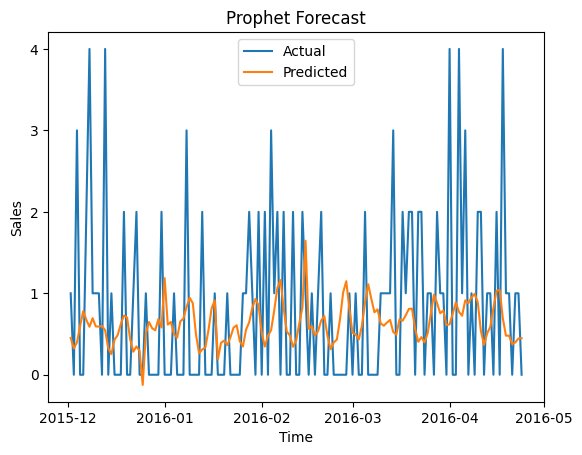

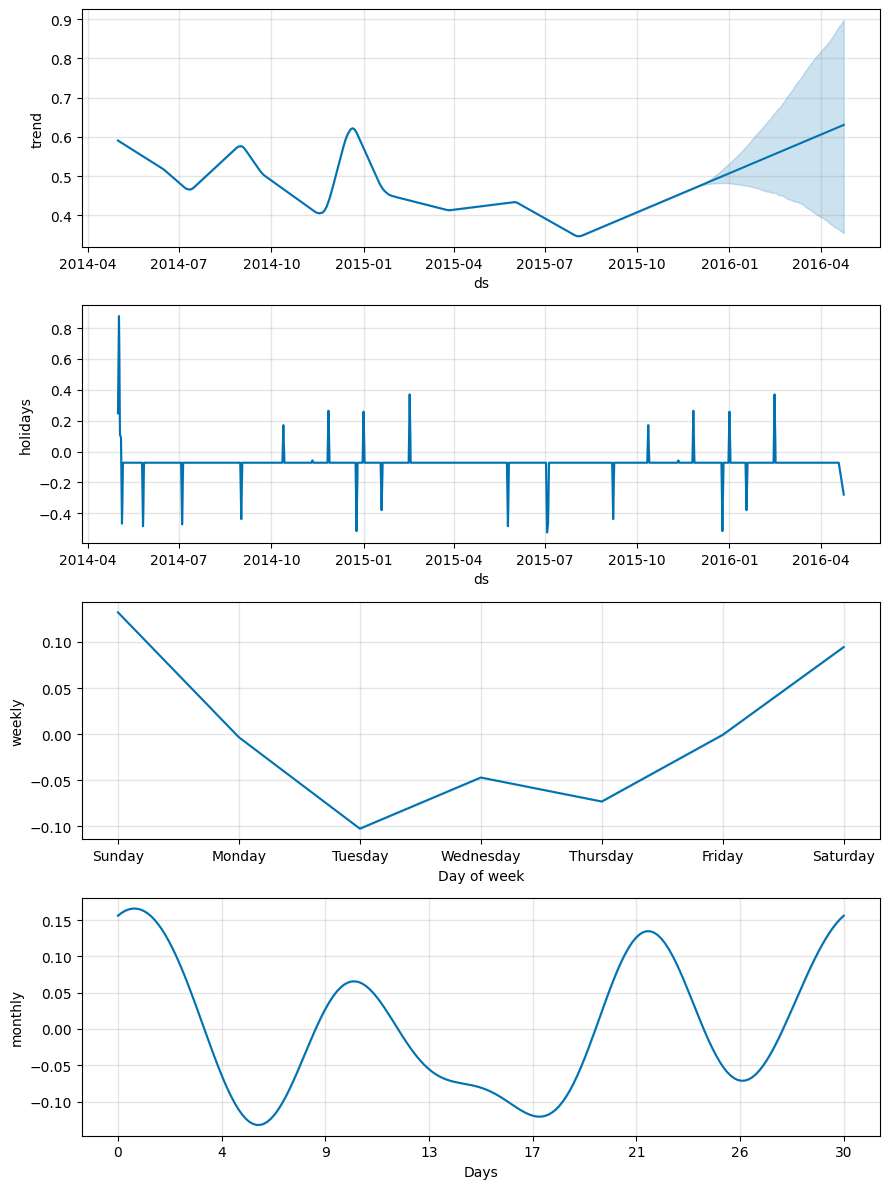

MAE: 0.8332197379991592
RMSE: 1.0701694893591154


In [95]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Preprocess the data
# Assuming you have preprocessed the data and selected a single time series for modeling
time_series1 = forecast_CA_food_001['y']

time_series = np.log1p(time_series1)

df = pd.DataFrame({'ds': forecast_CA_food_001['ds'], 'y': time_series, 'price': forecast_CA_food_001['sell_price']})

holiday_df = df_cal[df_cal['date'].isin(forecast_CA_food_001['ds'])]
holiday_df = holiday_df[['date', 'event_name_1', 'event_name_2', 'snap_CA']]
holiday_df = holiday_df[holiday_df['event_name_1'].notna() | holiday_df['event_name_2'].notna() | holiday_df['snap_CA'].notna()]
holiday_df

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Add holidays or special events if available
holidays = pd.DataFrame({
    'holiday': 'holiday_name',
    'ds': pd.to_datetime(holiday_df['date']),
    'lower_window': -5,
    'upper_window': 5,
})

# Create and fit the Prophet model
model = Prophet(
    seasonality_mode='additive',
    changepoint_prior_scale=5,
    seasonality_prior_scale=10,
    holidays_prior_scale=10,
    changepoint_range=0.8,
    n_changepoints = 200,
    holidays=holidays
)

model.add_country_holidays(country_name='US')  # Add country-specific holidays
model.add_seasonality(name='monthly', period=30, fourier_order=5)  # Add custom seasonality

# Fit the model to the training data
model.fit(train_data)

# Generate future dates for forecasting
future_dates = model.make_future_dataframe(periods=len(test_data))

# Make predictions
predictions = model.predict(future_dates)

predicted_values = np.expm1(predictions['yhat'].tail(len(test_data)))

actual_values = np.expm1(test_data['y'])

final_dict = {
    'ds' : predictions['ds'],
    'y' : predicted_values
}

final_df = pd.DataFrame(final_dict)

plt.plot(forecast_CA_food_001['ds'][train_size:], actual_values, label='Actual')
plt.plot(forecast_CA_food_001['ds'][train_size:], predicted_values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

# Plot components of the forecast (trend, seasonality, holidays)
model.plot_components(predictions)
plt.show()


from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
rmse = mean_squared_error(actual_values, predicted_values, squared=False)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

##PRophet 2 with Boxcox

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl1ewu4ab/8prjfosv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl1ewu4ab/41i3ppf3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92208', 'data', 'file=/tmp/tmpl1ewu4ab/8prjfosv.json', 'init=/tmp/tmpl1ewu4ab/41i3ppf3.json', 'output', 'file=/tmp/tmpl1ewu4ab/prophet_modeldwxmxett/prophet_model-20230621224834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:48:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:48:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


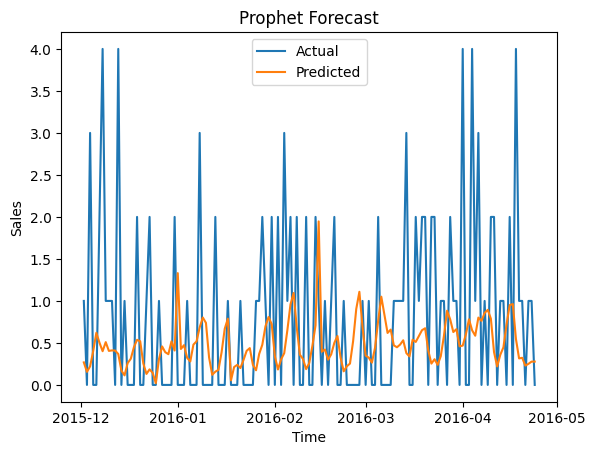

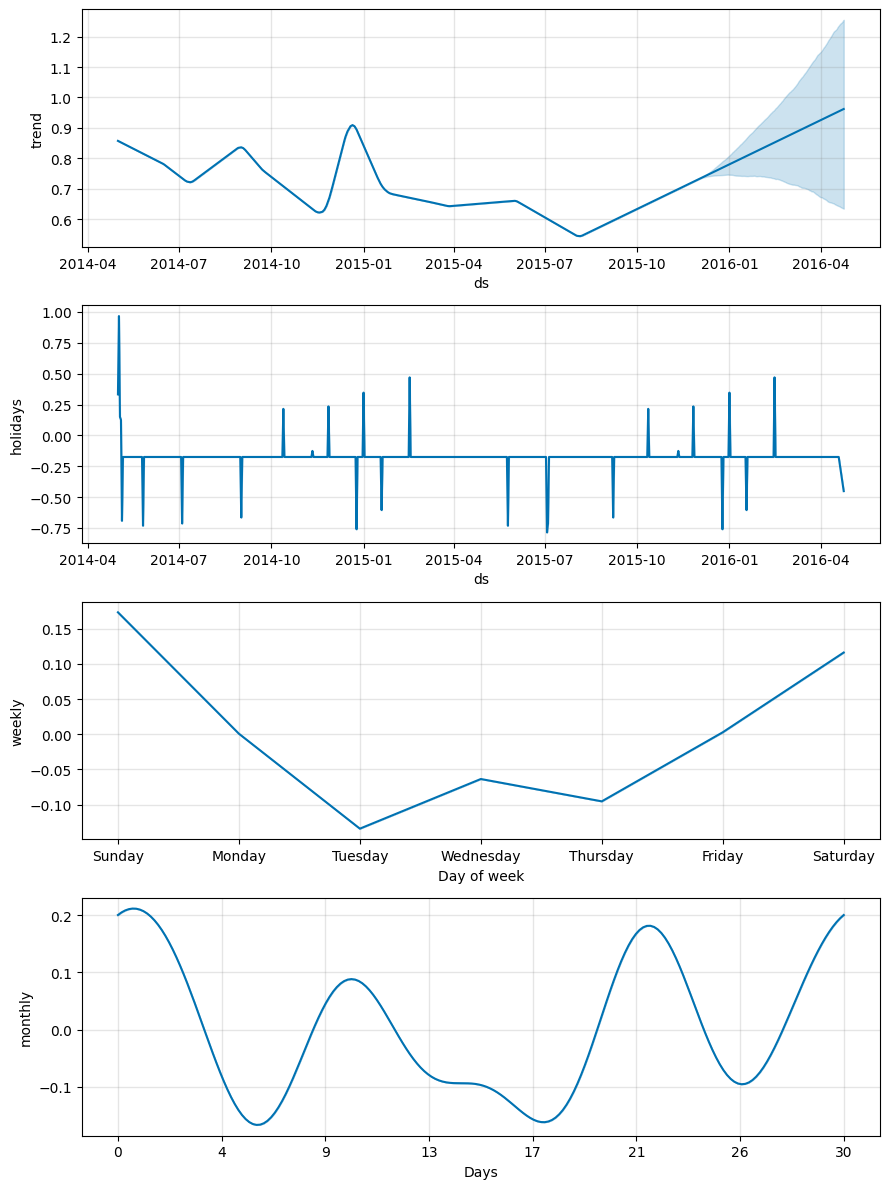

MAE: 0.8307561887404022
RMSE: 1.1137000284934706


In [113]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Preprocess the data
# Assuming you have preprocessed the data and selected a single time series for modeling
time_series1 = forecast_CA_food_001['y'].fillna(0)

time_series = np.sqrt(time_series1)

df = pd.DataFrame({'ds': forecast_CA_food_001['ds'], 'y': time_series, 'price': forecast_CA_food_001['sell_price']})

holiday_df = df_cal[df_cal['date'].isin(forecast_CA_food_001['ds'])]
holiday_df = holiday_df[['date', 'event_name_1', 'event_name_2', 'snap_CA']]
holiday_df = holiday_df[holiday_df['event_name_1'].notna() | holiday_df['event_name_2'].notna() | holiday_df['snap_CA'].notna()]
holiday_df

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Add holidays or special events if available
holidays = pd.DataFrame({
    'holiday': 'holiday_name',
    'ds': pd.to_datetime(holiday_df['date']),
    'lower_window': -5,
    'upper_window': 5,
})

# Create and fit the Prophet model
model = Prophet(
    seasonality_mode='additive',
    changepoint_prior_scale=5,
    seasonality_prior_scale=10,
    holidays_prior_scale=10,
    changepoint_range=0.8,
    n_changepoints = 200,
    holidays=holidays
)

model.add_country_holidays(country_name='US')  # Add country-specific holidays
model.add_seasonality(name='monthly', period=30, fourier_order=5)  # Add custom seasonality

# Fit the model to the training data
model.fit(train_data)

# Generate future dates for forecasting
future_dates = model.make_future_dataframe(periods=len(test_data))

# Make predictions
predictions = model.predict(future_dates)

predicted_values = np.power(predictions['yhat'].tail(len(test_data)), 2)

actual_values = np.power(test_data['y'], 2)

final_dict = {
    'ds' : predictions['ds'],
    'y' : predicted_values
}

final_df = pd.DataFrame(final_dict)

plt.plot(forecast_CA_food_001['ds'][train_size:], actual_values, label='Actual')
plt.plot(forecast_CA_food_001['ds'][train_size:], predicted_values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

# Plot components of the forecast (trend, seasonality, holidays)
model.plot_components(predictions)
plt.show()


from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
rmse = mean_squared_error(actual_values, predicted_values, squared=False)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

False

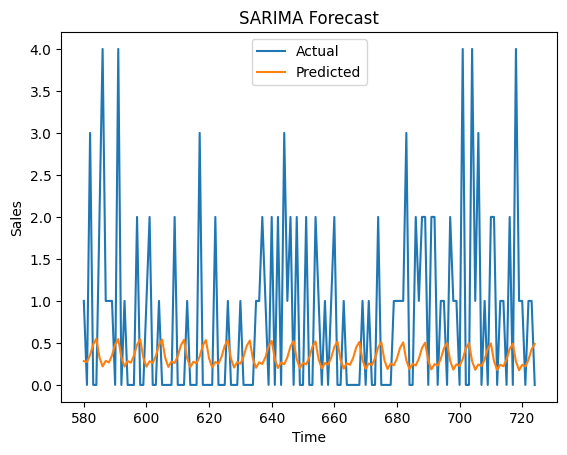

Mean Absolute Error: 0.8375861586855883
Root Mean Squared Error: 1.1600416287633417


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Preprocess the data
# Assuming you have preprocessed the data and selected a single time series for modeling
time_series = forecast_CA_food_001['y']

# Apply logarithmic transformation
log_transformed_data = np.log1p(time_series)  # Apply log transformation to handle small values

# Split the data into training and testing sets
train_size = int(len(log_transformed_data) * 0.8)
train_data = log_transformed_data[:train_size]
test_data = log_transformed_data[train_size:]

# SARIMA model parameters
order = (1, 1, 1)  # ARIMA order (p, d, q)
seasonal_order = (1, 1, 1, 7)  # Seasonal order (P, D, Q, s)

# Create and fit the SARIMA model
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Make predictions
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index)

# Convert predictions back to the original scale
predicted_values = np.expm1(predictions)  # Apply inverse log transformation

# Convert test data back to the original scale for evaluation
actual_values = np.expm1(test_data)

# Evaluate model performance
mae = mean_absolute_error(actual_values, predicted_values)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Visualize the actual and predicted sales
plt.plot(forecast_CA_food_001.index[train_size:], actual_values, label='Actual')
plt.plot(forecast_CA_food_001.index[train_size:], predicted_values, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


ADF Statistic: -27.325175939273247
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


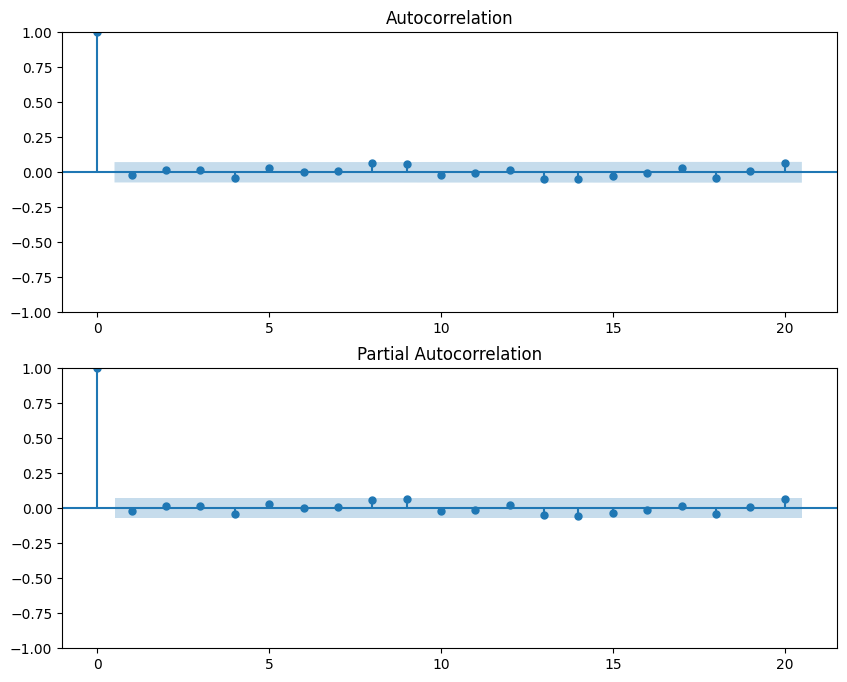

In [50]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series, ax=ax[0], lags=20)
plot_pacf(time_series, ax=ax[1], lags=20)
plt.show()


Optimization terminated successfully.
         Current function value: 1.160077
         Iterations: 5
         Function evaluations: 124
Mean Absolute Error (MAE): 0.8378812835820455
Root Mean Squared Error (RMSE): 1.050116293869917


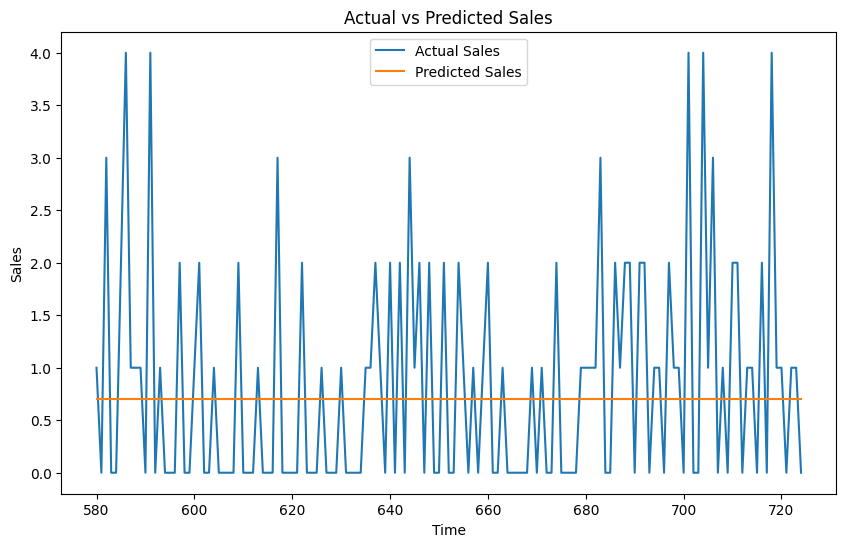

In [51]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_size = int(len(forecast_CA_food_001) * 0.8)
train_data = forecast_CA_food_001[:train_size]
test_data = forecast_CA_food_001[train_size:]

# Prepare the data
df = pd.DataFrame()
df['sales'] = train_data['y']
df['regressor1'] = train_data['sell_price'].astype(int)
# Add more regressor variables as needed

# Fit the Poisson regression model
X = df[['regressor1']]
X = sm.add_constant(X)
y = df['sales']

model = sm.ZeroInflatedPoisson(y, X)
zip_model = model.fit(method='powell')

# Make predictions
test_df = pd.DataFrame()
test_df['regressor1'] = test_data['sell_price']
test_df = sm.add_constant(test_df)

predictions = zip_model.predict(test_df)

# Evaluate the model's performance
mae = mean_absolute_error(test_data['y'], predictions)
rmse = mean_squared_error(test_data['y'], predictions, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


import matplotlib.pyplot as plt

# Plot actual sales and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['y'], label='Actual Sales')
plt.plot(predictions, label='Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


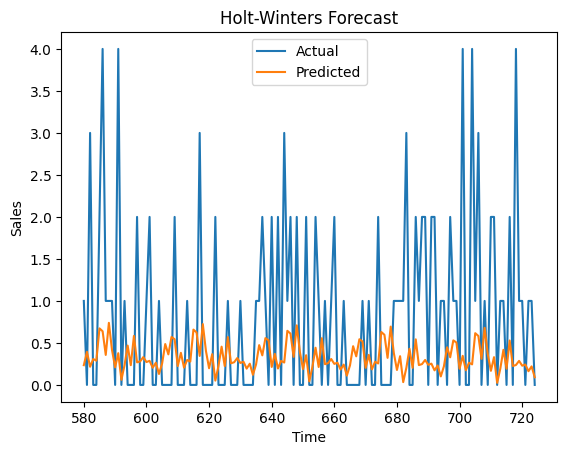

Mean Absolute Error: 0.8112356188154561
Root Mean Squared Error: 1.1495601974457494


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Preprocess the data
# Assuming you have preprocessed the data and selected a single time series for modeling
time_series = forecast_CA_food_001['y']
time_series = np.log1p(time_series)

# Split the data into training and testing sets
train_size = int(len(time_series) * 0.8)
train_data = time_series[:train_size]
test_data = time_series[train_size:]

# Holt-Winters model parameters
seasonal_periods = 30  # Number of periods in a season (weekly data)

# Create and fit the Holt-Winters model
model = ExponentialSmoothing(train_data, seasonal_periods=seasonal_periods, trend='add', seasonal='add')
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(len(test_data))
predictions_exp = np.expm1(predictions)
test_exp = np.expm1(test_data)

# Evaluate model performance
mae = mean_absolute_error(test_exp, predictions_exp)
rmse = np.sqrt(mean_squared_error(test_exp, predictions_exp))

# Visualize the actual and predicted sales
plt.plot(time_series.index[train_size:], test_exp, label='Actual')
plt.plot(time_series.index[train_size:], predictions_exp, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Holt-Winters Forecast')
plt.legend()
plt.show()

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


<ipython-input-104-a2dc66bc3b62>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['ds'])


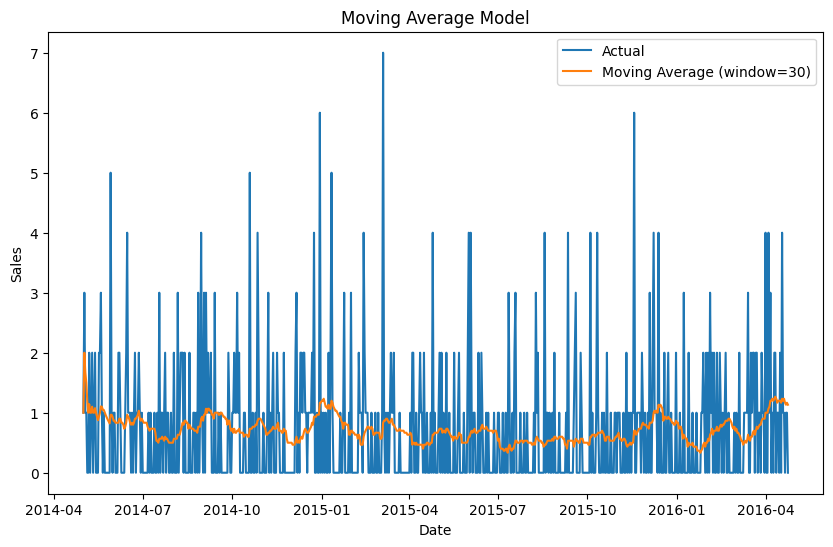

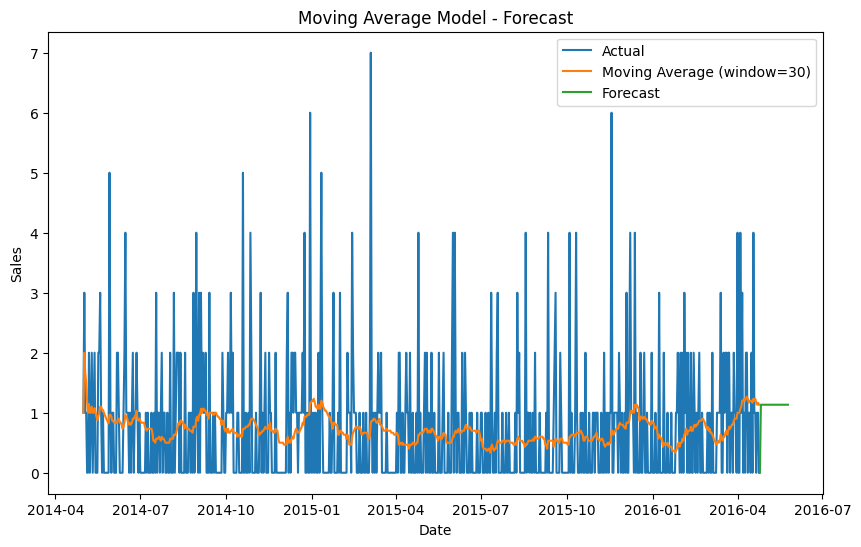

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = forecast_CA_food_001

# Preprocess the data
target_variable = 'y'
data['date'] = pd.to_datetime(data['ds'])
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Calculate the moving average
window = 30  # Adjust the window size as needed
moving_avg = data[target_variable].rolling(window=window, min_periods=1).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(data[target_variable], label='Actual')
plt.plot(moving_avg, label=f'Moving Average (window={window})')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Moving Average Model')
plt.legend()
plt.show()

# Make forecasts using the moving average
last_value = data[target_variable].iloc[-1]
forecast = [last_value]
forecast_periods = 30  # Adjust the number of forecast periods as needed

for i in range(forecast_periods):
    forecast.append(moving_avg.iloc[-1])

plt.figure(figsize=(10, 6))
plt.plot(data[target_variable], label='Actual')
plt.plot(moving_avg, label=f'Moving Average (window={window})')
plt.plot(pd.Series(forecast, index=pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods+1)), label='Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Moving Average Model - Forecast')
plt.legend()
plt.show()
